# TASK 1: PROBLEM STATEMENT
- Aim of the problem is to predict loan status based on certain features.

- Dataset Description Train.csv - 67463 rows x 35 columns (Includes target column as Loan Status)
- Attributes:
 1. ID: unique ID of representative 
 2. Loan Amount: loan amount applied 
 3. Funded Amount:loan amount funded 
 4. Funded Amount Investor: loan amount approved by the investors 
 5. Term: term of loan (in months) 
 6. Batch Enrolled: batch numbers to representatives 
 7. Interest Rate: interest rate (%) on loan
 8. Grade: grade by the bank 
 9. Sub Grade: sub-grade by the bank 
 10. Employment Duration: duration 
 11. Home Ownership: Owner ship of home 
 12. Verification Status: Income verification by the bank 
 13. Payment Plan: if any payment plan has started against loan 
 14. Loan Title: loan title provided 
 15. Debit to Income: ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage 
 16. Delinquency - two years: number of 30+ days delinquency in past 2 years  
 17. Inquires - six months: total number of inquiries in last 6 months
 18. Open Account: number of open credit line in representative's credit line  19. Public Record: number of derogatory public records 
 20. Revolving Balance: total credit revolving balance 
 21. Revolving Utilities: amount of credit a representative is using relative to revolving_balance 
 22. Total Accounts: total number of credit lines available in representatives credit line 
 23. Initial List Status: unique listing status of the loan - W(Waiting), F(Forwarded) 
 24. Total Received Interest: total interest received till date 
 25. Total Received Late Fee: total late fee received till date 
 26. Recoveries: post charge off gross recovery 
 27. Collection Recovery Fee: post charge off collection fee 
 28. Collection 12 months Medical: total collections in last 12 months excluding medical collections 
 29. Application Type: indicates when the representative is an individual or joint 
 30. Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled
 31.  Accounts Delinquent: number of accounts on which the representative is delinquent 
 32. Total Collection Amount: total collection amount ever owed 
 33. Total Current Balance: total current balance from all accounts 
 34. Total Revolving Credit Limit: total revolving credit limit 
 35. Loan Status: 1 = Defaulter, 0 = Non Defaulters

- Test.csv - 28913 rows x 34 columns(Includes target column as Loan Status) Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission.

- The challenge is to predict the Loan Status

- Knowledge and Skills Big dataset, underfitting vs overfitting Optimising log_loss to generalise well on unseen data
- Data source: https://www.kaggle.com/ankitkalauni/bank-loan-defaulter-prediction-hackathon

TASK 2: IMPORT LIBRARIES AND DATASETS

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('train.csv')
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
test_df= pd.read_csv('test.csv')
test_df.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.08269,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.79560,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.28083,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.82351,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [7]:
train = train.drop(columns = ['ID'])

In [8]:
train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [9]:
test_df = test_df.drop(columns = ['ID'])

In [10]:
test_df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [11]:
# Renaming Home ownership and employment duration columns as the column names seem to have been swapped
train.rename(columns={'Home Ownership': 'Employment Duration', "Employment Duration":"Home Ownership"}, inplace=True)
test_df.rename(columns={'Home Ownership': 'Employment Duration', "Employment Duration":"Home Ownership"}, inplace=True)

In [12]:
train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [13]:
test_df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [14]:
#checking for missing values
train.isnull().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Accounts Delin

In [15]:
test_df.isnull().sum()

Loan Amount                         0
Funded Amount                       0
Funded Amount Investor              0
Term                                0
Batch Enrolled                      0
Interest Rate                       0
Grade                               0
Sub Grade                           0
Home Ownership                      0
Employment Duration                 0
Verification Status                 0
Payment Plan                        0
Loan Title                          0
Debit to Income                     0
Delinquency - two years             0
Inquires - six months               0
Open Account                        0
Public Record                       0
Revolving Balance                   0
Revolving Utilities                 0
Total Accounts                      0
Initial List Status                 0
Total Received Interest             0
Total Received Late Fee             0
Recoveries                          0
Collection Recovery Fee             0
Collection 1

In [16]:
#checking for unique values in the dataframes 
train.nunique().sort_values().head(35)

Accounts Delinquent                 1
Payment Plan                        1
Loan Status                         2
Application Type                    2
Collection 12 months Medical        2
Initial List Status                 2
Term                                3
Home Ownership                      3
Verification Status                 3
Public Record                       5
Inquires - six months               6
Grade                               7
Delinquency - two years             9
Sub Grade                          35
Open Account                       36
Batch Enrolled                     41
Total Accounts                     69
Loan Title                        109
Last week Pay                     162
Total Collection Amount          2193
Revolving Balance               20582
Funded Amount                   24548
Loan Amount                     27525
Total Revolving Credit Limit    37708
Total Current Balance           60901
Collection Recovery Fee         67313
Total Receiv

In [17]:
test_df.nunique().sort_values(ascending = True)

Loan Status                         0
Payment Plan                        1
Accounts Delinquent                 2
Application Type                    2
Collection 12 months Medical        2
Initial List Status                 2
Home Ownership                      3
Verification Status                 3
Term                                4
Public Record                       5
Inquires - six months               6
Grade                               7
Delinquency - two years            10
Sub Grade                          35
Open Account                       36
Batch Enrolled                     41
Total Accounts                     70
Loan Title                        109
Last week Pay                     162
Total Collection Amount          1551
Funded Amount                   14552
Loan Amount                     15664
Revolving Balance               16204
Total Revolving Credit Limit    18308
Total Received Late Fee         21535
Collection Recovery Fee         21603
Recoveries  

In [18]:
train.dtypes

Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Home Ownership                   object
Employment Duration             float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64


In [19]:
# encoding categoriacl columns into numerical
from sklearn.preprocessing import LabelEncoder

for column in train.columns:
    if train[column].dtype == np.number:
        continue
    train[column] = LabelEncoder().fit_transform(train[column])
    
    

In [20]:
train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,7094,22699,12329.36286,2,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0,0,49,0,30,51921,5050,0
1,1334,7866,12191.99692,2,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0,0,109,0,52,38407,16786,0
2,22610,5260,21603.22455,2,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0,0,66,0,33,23733,20266,0
3,8155,2937,17877.15585,2,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0,0,39,0,39,995,33921,0
4,13477,9079,13539.92667,2,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0,0,18,0,340,29936,17944,0


In [21]:
for column in test_df.columns:
    if test_df[column].dtype == np.number:
        continue
    test_df[column] = LabelEncoder().fit_transform(test_df[column])

In [22]:
test_df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,8234,4308,16025.082690,2,18,12.163926,0,15,2,76468.82190,...,8.425776,0.731797,0,0,135,0,24,26623,1719,NaN
1,2374,5375,12615.795600,2,20,6.564296,1,22,0,38079.01344,...,6.157008,0.992918,0,0,56,0,1,10074,769,NaN
2,12379,11901,11621.280830,2,5,14.729900,0,12,0,51275.93268,...,5.705077,0.281580,0,0,3,0,26,23050,8913,NaN
3,14382,3732,15375.823510,2,32,10.523767,0,1,2,68867.98965,...,2.469688,0.959162,0,0,21,0,32,6022,3268,NaN
4,3368,3543,7176.647582,1,29,9.997013,2,7,1,91556.85423,...,2.127835,0.402315,0,0,104,0,33,11928,11034,NaN


In [23]:
test_df['Loan Status'].unique()

array([nan])

In [24]:
X_train= train.drop(['Loan Status'],axis=1)
X_train.shape

(67463, 33)

In [25]:
y_train = train['Loan Status']
y_train.shape

(67463,)

In [26]:
X_test_df= test_df.drop(['Loan Status'],axis=1)
X_test_df.shape

(28913, 33)

In [27]:
y_test_df= test_df['Loan Status']
y_test_df.shape

(28913,)

### Performing Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,0.257739,0.924716,0.330964,1.0,0.400,0.265983,0.166667,0.382353,0.0,0.412699,...,0.002395,0.000574,0.004757,0.0,0.0,0.304348,0.0,0.013686,0.852562,0.133927
1,0.048467,0.320446,0.326910,1.0,0.100,0.316414,0.333333,0.500000,1.0,0.064442,...,0.000849,0.000546,0.005843,0.0,0.0,0.677019,0.0,0.023723,0.630657,0.445169
2,0.821465,0.214283,0.604649,1.0,0.275,0.330517,0.833333,0.529412,0.0,0.196264,...,0.440618,0.000991,0.006114,0.0,0.0,0.409938,0.0,0.015055,0.389704,0.537460
3,0.296287,0.119648,0.494688,1.0,0.375,0.521957,0.333333,0.352941,0.0,0.239071,...,0.001035,0.000025,0.004495,0.0,0.0,0.242236,0.0,0.017792,0.016338,0.899594
4,0.489645,0.369862,0.366690,1.0,0.800,0.443150,0.333333,0.529412,0.0,0.075669,...,0.453007,0.297354,0.002211,0.0,0.0,0.111801,0.0,0.155109,0.491560,0.475880


In [29]:
X_test_df =pd.DataFrame(scaler.fit_transform(X_test_df),columns=X_test_df.columns)
X_test_df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,0.525698,0.296062,0.441914,0.666667,0.450,0.311229,0.000000,0.441176,1.0,0.157028,...,0.002070,0.001948,0.000985,0.0,0.0,0.838509,0.0,0.015484,0.965721,0.093899
1,0.151567,0.369390,0.341641,0.666667,0.500,0.056585,0.166667,0.647059,0.0,0.059104,...,0.000970,0.001423,0.001336,0.0,0.0,0.347826,0.0,0.000645,0.365424,0.042006
2,0.790334,0.817882,0.312391,0.666667,0.125,0.427917,0.000000,0.352941,0.0,0.092767,...,0.000511,0.001319,0.000379,0.0,0.0,0.018634,0.0,0.016774,0.836114,0.486863
3,0.918215,0.256477,0.422818,0.666667,0.800,0.236642,0.000000,0.029412,1.0,0.137640,...,0.002173,0.000571,0.001291,0.0,0.0,0.130435,0.0,0.020645,0.218442,0.178511
4,0.215029,0.243488,0.181666,0.333333,0.725,0.212688,0.333333,0.205882,0.5,0.195515,...,0.000244,0.000492,0.000541,0.0,0.0,0.645963,0.0,0.021290,0.432676,0.602720


### Visualizing the train dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa8f060e90>,
      dtype=object)

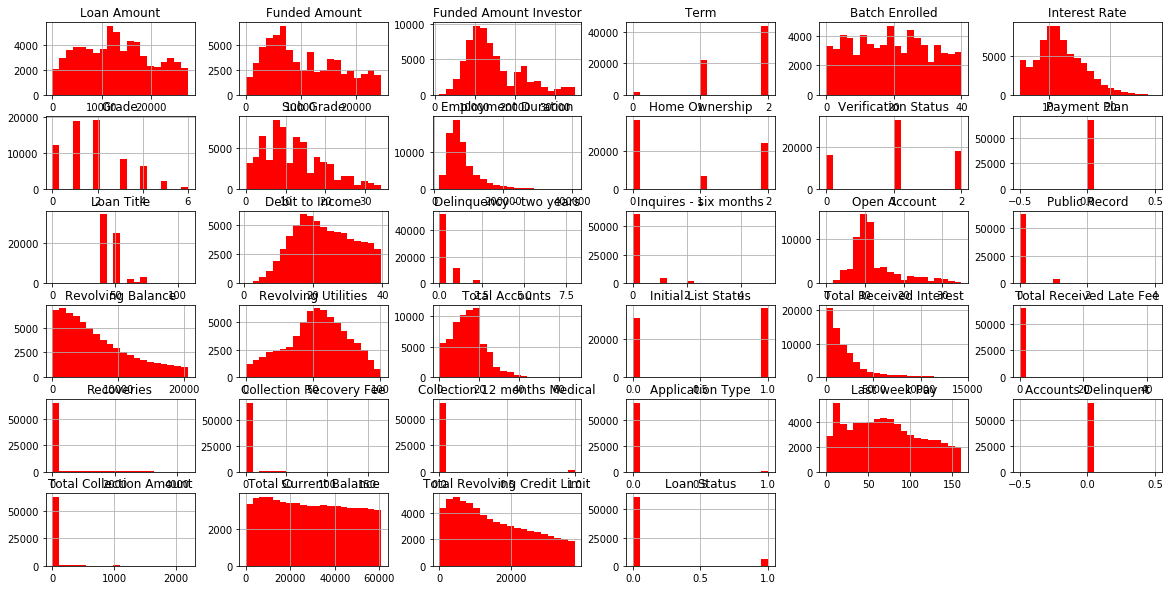

In [30]:
#plotting histogram of the train dataframe
train[['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']].hist(bins = 20, figsize = (20,10), color = 'r', )

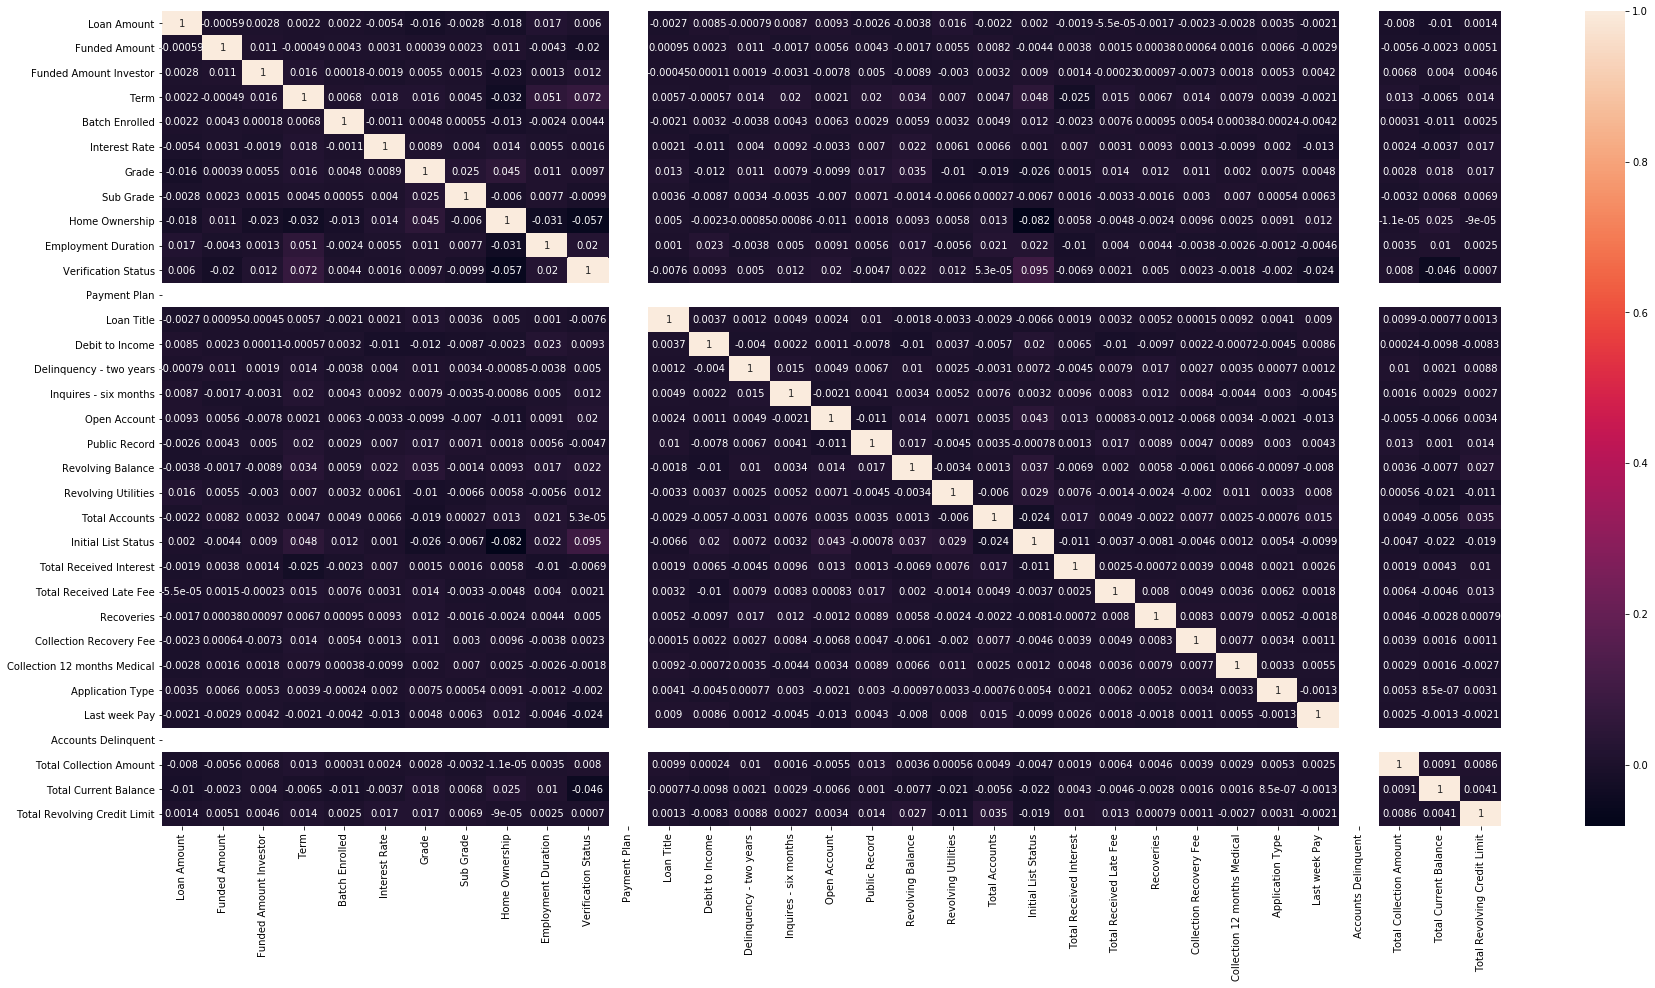

In [31]:
corr = X_train.corr()
top_features = corr.index
plt.figure(figsize=(30,15))
sns.heatmap(X_train[top_features].corr(),annot=True)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25)

### performing features selection

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[0.04118771 0.04093348 0.04182558 0.01268156 0.03962745 0.04106906
 0.0344011  0.04030403 0.01713108 0.04177773 0.02571639 0.
 0.03380735 0.04060448 0.02326841 0.01503719 0.03941219 0.01120171
 0.04030331 0.04041989 0.04102538 0.00850753 0.04085128 0.04082752
 0.04040145 0.03952428 0.00440353 0.00081346 0.04092134 0.
 0.04028696 0.04080153 0.04092605]


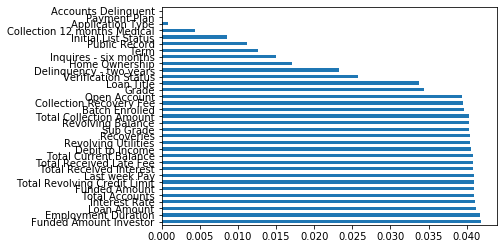

<Figure size 1296x720 with 0 Axes>

In [35]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(33).plot(kind='barh')
plt.figure(figsize=[18,10])
plt.show()

In [36]:
ranked_features.nlargest(25,keep='all')

Funded Amount Investor          0.041826
Employment Duration             0.041778
Loan Amount                     0.041188
Interest Rate                   0.041069
Total Accounts                  0.041025
Funded Amount                   0.040933
Total Revolving Credit Limit    0.040926
Last week Pay                   0.040921
Total Received Interest         0.040851
Total Received Late Fee         0.040828
Total Current Balance           0.040802
Debit to Income                 0.040604
Revolving Utilities             0.040420
Recoveries                      0.040401
Sub Grade                       0.040304
Revolving Balance               0.040303
Total Collection Amount         0.040287
Batch Enrolled                  0.039627
Collection Recovery Fee         0.039524
Open Account                    0.039412
Grade                           0.034401
Loan Title                      0.033807
Verification Status             0.025716
Delinquency - two years         0.023268
Home Ownership  

In [37]:
#selecting highly correlated features and removing them
threshold=0.60
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.colname[i]
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X_train, threshold)
len(set(corr_features))

0

- Features are not correlated with each other

In [39]:
X_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
59609,0.226312,0.493624,0.495314,0.5,0.150,0.127805,0.500000,0.764706,1.0,0.177716,...,0.001161,0.626528,0.006327,0.0,0.0,0.633540,0.0,0.010036,0.915764,0.038189
52371,0.306823,0.175500,0.364253,1.0,0.625,0.265825,0.333333,0.500000,1.0,0.155899,...,0.000823,0.001133,0.006135,0.0,0.0,0.552795,0.0,0.016880,0.192479,0.604901
66760,0.609504,0.638164,0.430135,0.5,0.250,0.446091,0.333333,0.588235,0.5,0.433271,...,0.002671,0.001703,0.007859,0.0,0.0,0.062112,0.0,0.016880,0.144828,0.171215
25054,0.315761,0.536725,0.305431,1.0,0.550,0.026264,0.166667,0.088235,0.0,0.224035,...,0.000811,0.001524,0.005113,0.0,0.0,0.273292,0.0,0.020073,0.848539,0.118254
52774,0.593446,0.658777,0.436748,1.0,0.400,0.349525,0.333333,0.352941,0.0,0.114259,...,0.001190,0.000384,0.001059,0.0,0.0,0.372671,0.0,0.020529,0.047094,0.326730


In [40]:
X_train.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Home Ownership', 'Employment Duration', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [41]:
X_train = X_train.drop(columns = ['Inquires - six months', 'Term', 'Public Record', 'Initial List Status', 'Collection 12 months Medical', 'Application Type', 'Payment Plan', 'Accounts Delinquent'], axis = 1)
X_train.shape

(50597, 25)

In [42]:
X_test = X_test.drop(columns = ['Inquires - six months', 'Term', 'Public Record', 'Initial List Status', 'Collection 12 months Medical', 'Application Type', 'Payment Plan', 'Accounts Delinquent'], axis = 1)
X_test.shape

(16866, 25)

In [43]:
#FINAL TEST DATAFRAME USED FOR PREDICTION FOR SUNMISSION
X_test_df= X_test_df.drop(columns = ['Inquires - six months', 'Term', 'Public Record', 'Initial List Status', 'Collection 12 months Medical', 'Application Type', 'Payment Plan', 'Accounts Delinquent'], axis = 1)
X_test_df.shape

(28913, 25)




## MODEL DEVELOPMENT

In [44]:
X_train.shape

(50597, 25)

In [45]:
X_test.shape

(16866, 25)

In [46]:
y_train.shape

(50597,)

In [47]:
y_test.shape

(16866,)

In [48]:
y_train.value_counts()

0    45896
1     4701
Name: Loan Status, dtype: int64

In [49]:
y_test.value_counts()

0    15326
1     1540
Name: Loan Status, dtype: int64

In [50]:
from imblearn.combine import SMOTETomek
from collections import Counter
Counter(y_train)

Counter({0: 45896, 1: 4701})

In [51]:
#dealing with imbalance in the dataset
os=SMOTETomek(0.75)
X_train_smtom,y_train_smtom=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smtom)))

The number of classes before fit Counter({0: 45896, 1: 4701})
The number of classes after fit Counter({0: 45891, 1: 34417})


In [52]:
#importing our logistic regression form sklean
from sklearn.linear_model import LogisticRegression
lr_classifier= LogisticRegression()
lr_classifier.fit(X_train_smtom, y_train_smtom)

LogisticRegression()

In [53]:
#scores on the training dataset
lr_classifier.score(X_train_smtom, y_train_smtom)

0.5638790655974498

In [54]:
#scores on the testing dataset
lr_classifier.score(X_test, y_test)

0.8869322898138267

In [55]:
#probabilities on training data
pred_prob1 = lr_classifier.predict_proba(X_train_smtom)

In [56]:
pred_prob1

array([[0.60550922, 0.39449078],
       [0.52613244, 0.47386756],
       [0.59101857, 0.40898143],
       ...,
       [0.55057951, 0.44942049],
       [0.54211403, 0.45788597],
       [0.57945189, 0.42054811]])

In [57]:
#probabilities on testing data
pred_prob2 = lr_classifier.predict_proba(X_test)

In [58]:
pred_prob2

array([[0.56987113, 0.43012887],
       [0.55550092, 0.44449908],
       [0.62143101, 0.37856899],
       ...,
       [0.51473973, 0.48526027],
       [0.61255935, 0.38744065],
       [0.65601726, 0.34398274]])

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = lr_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14902   424]
 [ 1483    57]]
0.8869322898138267
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     15326
           1       0.12      0.04      0.06      1540

    accuracy                           0.89     16866
   macro avg       0.51      0.50      0.50     16866
weighted avg       0.84      0.89      0.86     16866



In [60]:
#performing cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr_classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.87 %
Standard Deviation: 0.00 %


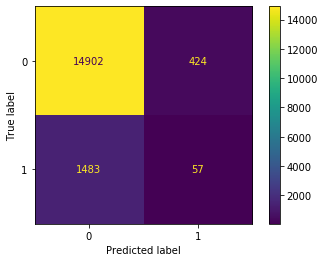

In [61]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_classifier, X_test, y_test)

In [62]:
#running log loss on training dataset
from sklearn.metrics import log_loss
print('log loss on training is: ', log_loss(y_train_smtom, pred_prob1))

log loss on training is:  0.6792997390952233


In [63]:
#running log loss on testing dataset

print('log loss on testing is: ', log_loss(y_test, pred_prob2))

log loss on testing is:  0.5853814735714642


# USING RANDOMFOREST MODEL

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_smtom, y_train_smtom)

RandomForestClassifier(random_state=42)

In [65]:
#scores on the training dataset
rf_classifier.score(X_train_smtom, y_train_smtom)

1.0

In [66]:
#scores on the testing dataset
rf_classifier.score(X_test, y_test)

0.9059053717538242

In [67]:
#probabilities on training data
pred_prob3 = rf_classifier.predict_proba(X_train_smtom)

In [68]:
pred_prob3

array([[0.94, 0.06],
       [0.94, 0.06],
       [0.87, 0.13],
       ...,
       [0.  , 1.  ],
       [0.12, 0.88],
       [0.05, 0.95]])

In [69]:
#probabilities on testing data
pred_prob4 = rf_classifier.predict_proba(X_test)

In [70]:
pred_prob4

array([[0.8 , 0.2 ],
       [0.88, 0.12],
       [0.81, 0.19],
       ...,
       [0.91, 0.09],
       [0.86, 0.14],
       [0.77, 0.23]])

In [132]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[2260    0]
 [   0 1756]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2260
           1       1.00      1.00      1.00      1756

    accuracy                           1.00      4016
   macro avg       1.00      1.00      1.00      4016
weighted avg       1.00      1.00      1.00      4016



In [72]:

#performing cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_classifier, X = X_train_smtom, y = y_train_smtom, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.03 %
Standard Deviation: 10.80 %


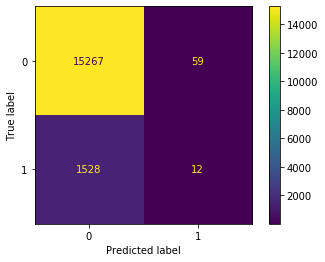

In [73]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier, X_test, y_test)

In [74]:
#running log loss on training dataset
from sklearn.metrics import log_loss
print('log loss on training is: ', log_loss(y_train_smtom, pred_prob3))

log loss on training is:  0.07453528371294045


In [75]:
#running log loss on testing dataset
print('log loss on testing is: ', log_loss(y_test, pred_prob4 ))

log loss on testing is:  0.343372452289214


# USING XGBOOST MODEL

In [76]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_smtom, y_train_smtom)

[14:22:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
#scores on the training data
xgb_classifier.score(X_train_smtom, y_train_smtom)

0.9424590327240125

In [78]:
# scores on the testing data
xgb_classifier.score(X_test, y_test)

0.9060832443970117

In [79]:
#probabilities on training data
pred_prob5 = xgb_classifier.predict_proba(X_train_smtom)

In [80]:
pred_prob5

array([[9.3847585e-01, 6.1524149e-02],
       [8.6287951e-01, 1.3712046e-01],
       [8.4206927e-01, 1.5793070e-01],
       ...,
       [5.0818920e-04, 9.9949181e-01],
       [2.1110535e-02, 9.7888947e-01],
       [6.7942798e-02, 9.3205720e-01]], dtype=float32)

In [81]:
#probabilities on testing data
pred_prob6 = xgb_classifier.predict_proba(X_test)

In [82]:
pred_prob6

array([[0.8781359 , 0.1218641 ],
       [0.8767757 , 0.1232243 ],
       [0.8417864 , 0.15821359],
       ...,
       [0.8692291 , 0.13077095],
       [0.9490729 , 0.05092712],
       [0.8484325 , 0.15156753]], dtype=float32)

In [83]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred2 = xgb_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[15272    54]
 [ 1530    10]]
0.9060832443970117
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15326
           1       0.16      0.01      0.01      1540

    accuracy                           0.91     16866
   macro avg       0.53      0.50      0.48     16866
weighted avg       0.84      0.91      0.87     16866



In [84]:

#performing cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train_smtom, y = y_train_smtom, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[14:22:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

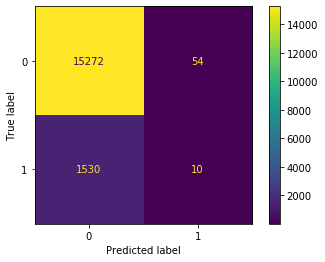

In [85]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_classifier, X_test, y_test)

In [86]:
#running log loss on training dataset
from sklearn.metrics import log_loss
print('log loss on training is: ', log_loss(y_train_smtom, pred_prob5))

log loss on training is:  0.15441136740633749


In [87]:
#running log loss on testing dataset
print('log loss on testing is: ', log_loss(y_test, pred_prob6 ))

log loss on testing is:  0.324420693880116


# hyperparameter tunning

In [88]:
from sklearn.model_selection import RandomizedSearchCV
params= {
    "n_estimators" : [200, 250, 300, 350, 400, 450, 500],
    "learning_rate" : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}



xgb_rsearchcv= RandomizedSearchCV(xgb_classifier, param_distributions=params, n_iter=15, scoring='neg_root_mean_squared_error', n_jobs= -1, cv= 5)
xgb_rsearchcv.fit(X_train_smtom, y_train_smtom)

[15:23:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact

In [89]:
#best parameters
xgb_rsearchcv.best_params_

{'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [90]:
xgbest=xgb_rsearchcv.best_estimator_
y_preds=xgbest.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(" Accuracy  Score {}".format(accuracy_score(y_test,y_preds)))
print(" Classification  report: {}".format(classification_report(y_test,y_preds)))

[[15316    10]
 [ 1538     2]]
 Accuracy  Score 0.9082177161152615
 Classification  report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     15326
           1       0.17      0.00      0.00      1540

    accuracy                           0.91     16866
   macro avg       0.54      0.50      0.48     16866
weighted avg       0.84      0.91      0.87     16866



In [91]:
#probabilities on training data
pred_prob7 = xgbest.predict_proba(X_train_smtom)

In [92]:
#probabilities on testing data
pred_prob8 = xgbest.predict_proba(X_test)

In [93]:
#running log loss on training dataset
from sklearn.metrics import log_loss
print('log loss on training is: ', log_loss(y_train_smtom, pred_prob7))

log loss on training is:  0.016169255138069254


In [94]:
#running log loss on testing dataset
print('log loss on testing is: ', log_loss(y_test, pred_prob8))

log loss on testing is:  0.3927265758933887


In [95]:
# predicting the test dataframe using xgboost after hyperparameter tunning
y_pred_data = xgbest.predict(X_test_df)

In [96]:
y_pred_data

array([1, 0, 0, ..., 0, 0, 0])

In [98]:
y_pred_df = pd.DataFrame(y_pred_data)
y_pred_df.value_counts()

0    23448
1     5465
dtype: int64

In [99]:
y_pred_final=pd.DataFrame(y_pred_df).rename(columns={0:"Loan Status"})
y_pred_final.to_csv('my_submission.csv',index=False)

# PERFORMING HYPERPARAMETER TUNNING IN AWS SAGEMAKER

In [101]:
import sagemaker
import boto3


#creating sagemaker session
sagemaker_session = sagemaker.Session()
region = boto3.Session().region_name
#defining the s3 bucket and prefix that we want to use in this session
bucket = "sagemaker-machine-learning1"
prefix = "loan_status_Xgboost"

#Execution role for the notebook instances 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::158804195875:role/service-role/AmazonSageMaker-ExecutionRole-20220102T073731


In [102]:
X_train_smtom.shape

(80308, 25)

In [103]:
y_train_smtom.shape

(80308,)

In [104]:
# converting the array into the dataframe in a way the target variable is the first column
train_data = pd.DataFrame({'Target': y_train_smtom})
train_data

,Target
0,0
1,0
2,0
3,0
4,0
...,...
80303,1
80304,1
80305,1
80306,1


In [105]:
for i in range(X_train_smtom.shape[1]):
    train_data[i] = X_train_smtom.iloc[:,i]
    

In [106]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,0.226312,0.493624,0.495314,0.150,0.127805,0.500000,0.764706,1.0,0.177716,...,0.565507,0.176471,0.050660,0.001161,0.626528,0.006327,0.633540,0.010036,0.915764,0.038189
1,0,0.306823,0.175500,0.364253,0.625,0.265825,0.333333,0.500000,1.0,0.155899,...,0.722889,0.132353,0.203453,0.000823,0.001133,0.006135,0.552795,0.016880,0.192479,0.604901
2,0,0.609504,0.638164,0.430135,0.250,0.446091,0.333333,0.588235,0.5,0.433271,...,0.567473,0.250000,0.079385,0.002671,0.001703,0.007859,0.062112,0.016880,0.144828,0.171215
3,0,0.315761,0.536725,0.305431,0.550,0.026264,0.166667,0.088235,0.0,0.224035,...,0.683611,0.147059,0.179059,0.000811,0.001524,0.005113,0.273292,0.020073,0.848539,0.118254
4,0,0.593446,0.658777,0.436748,0.400,0.349525,0.333333,0.352941,0.0,0.114259,...,0.609190,0.058824,0.036735,0.001190,0.000384,0.001059,0.372671,0.020529,0.047094,0.326730


In [107]:
train_data_size = int(0.9 * train_data.shape[0])
train_data_size

72277

In [108]:
#shuffle the data in dataframe and split the dataframe into train, test, validation 
import sklearn 
train_data = sklearn.utils.shuffle(train_data)
train, test, valid = train_data[:train_data_size], train_data[train_data_size:train_data_size + 4016],train_data[train_data_size + 4016:]



In [109]:
train.shape, test.shape, valid.shape

((72277, 26), (4016, 26), (4015, 26))

In [110]:
X_test, y_test = test.drop(columns = ['Target']),test['Target']

In [111]:
# save the train data and the validation data as csv file
train.to_csv('train.csv', header = False, index = False)
valid.to_csv('valid.csv', header = False, index = False)

In [112]:
prefix = "loan_status_Xgboost"
key = "loan_status_Xgboost"

In [113]:
#read the data from csv file and then upload the data into s3 bucket
import os

#the following code uploads data in record-io format to s3 bucket to be accessed later for train
with open ('train.csv', 'rb') as f:
    boto3.Session().resource("s3").Bucket(bucket).Object(os.path.join(prefix, "train", key)).upload_fileobj(f)

#printing out the training data location in s3
s3_train_data = "s3://{}/{}/train/{}".format(bucket, prefix, key)
print("uploaded training data location: {}".format(s3_train_data))

uploaded training data location: s3://sagemaker-machine-learning1/loan_status_Xgboost/train/loan_status_Xgboost


In [114]:
#read the data from csv file and then upload the data into s3 bucket
import os

#the following code uploads data in record-io format to s3 bucket to be accessed later for train
with open ('valid.csv', 'rb') as f:
    boto3.Session().resource("s3").Bucket(bucket).Object(os.path.join(prefix, "valid", key)).upload_fileobj(f)

#printing out the training data location in s3
s3_valid_data = "s3://{}/{}/valid/{}".format(bucket, prefix, key)
print("uploaded training data location: {}".format(s3_valid_data))

uploaded training data location: s3://sagemaker-machine-learning1/loan_status_Xgboost/valid/loan_status_Xgboost


In [115]:
#create an output palceholder in s3 bucket to store the Xgboost output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print("Training artifacts will be uploaded to: {}".format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-machine-learning1/loan_status_Xgboost/output


In [116]:
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, "latest")


In [121]:
# passing  the xgboost model in the container
#output path and sagemaker session into the estimator
#also specify how many instances  we would like to use for training

xgboost_classifier= sagemaker.estimator.Estimator(
                                   container,
                                   role,
                                   instance_count=1,
                                   instance_type="ml.m4.xlarge",
                                   output_path=output_location,
                                   sagemaker_session=sagemaker_session,
                                   use_spot_instances= True,
                                   max_run = 300,
                                   max_wait = 600)
xgboost_classifier.set_hyperparameters(
                       max_depth=8,
                       objective='multi:softmax',
                       eta=0.5,
                       gamma=0.1,
                       learning_rate=0.2,
                       colsample_bytress = 0.3,
                       num_class=2,
                       num_round=100)


In [122]:
#create train and validation channels to feed in  the model
train_input = sagemaker.inputs.TrainingInput(s3_data = s3_train_data, content_type='csv', s3_data_type ='S3Prefix')
valid_input = sagemaker.inputs.TrainingInput(s3_data = s3_valid_data, content_type='csv', s3_data_type ='S3Prefix')

xgboost_classifier.fit({'train': train_input, 'validation': valid_input})

2022-01-16 16:04:45 Starting - Starting the training job...
2022-01-16 16:05:08 Starting - Launching requested ML instancesProfilerReport-1642349085: InProgress
...
2022-01-16 16:05:43 Starting - Preparing the instances for training............
2022-01-16 16:07:29 Downloading - Downloading input data...
2022-01-16 16:08:09 Training - Downloading the training image.Arguments: train
[2022-01-16:16:08:20:INFO] Running standalone xgboost training.
[2022-01-16:16:08:20:INFO] File size need to be processed in the node: 32.14mb. Available memory size in the node: 8358.71mb
[2022-01-16:16:08:20:INFO] Determined delimiter of CSV input is ','
[16:08:20] S3DistributionType set as FullyReplicated
[16:08:20] 72277x25 matrix with 1806925 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2022-01-16:16:08:20:INFO] Determined delimiter of CSV input is ','
[16:08:20] S3DistributionType set as FullyReplicated
[16:08:20] 4015x25 matrix with 100375 entries loaded from /opt

In [123]:

# Deploying the model to perform inference 
#from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer
xgboost_classifier = xgboost_classifier.deploy(initial_instance_count = 1,
                                instance_type = "ml.t2.medium",
                                serializer = CSVSerializer())  
                             
                                              
                                              
                        
                       

-------!

In [124]:
#makeing predictions
xgb_prediction = xgboost_classifier.predict(np.array(X_test))

In [125]:
xgb_prediction

b'0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.

In [126]:
#converting values in bytes form to array
def bytes_2_array(x):
    #makes entire prediction as string and split based on ','
    l = str(x).split(',')
    #removing unwanted characters (b, ',')
    l[0] = l[0][2:]
    
    #removing (')
    l[-1] = l[-1][:-1]
    #itering through a list of a string and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
    #conveting a list into an array
    l = np.array(l).astype("float32")
    
    #reshaping one-dimentional array into two-dimensional array
    return l.reshape(-1,1)
                          
    

In [127]:
predicted_values = bytes_2_array(xgb_prediction)

In [128]:
predicted_values

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [129]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [130]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [137]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test, predicted_values))
print(accuracy_score(y_test, predicted_values))
print(classification_report(y_test, predicted_values))

[[2242   18]
 [ 241 1515]]
0.93550796812749
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2260
           1       0.99      0.86      0.92      1756

    accuracy                           0.94      4016
   macro avg       0.95      0.93      0.93      4016
weighted avg       0.94      0.94      0.93      4016



<Figure size 432x288 with 0 Axes>

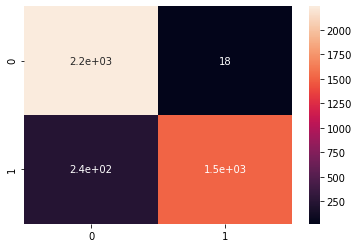

<Figure size 432x288 with 0 Axes>

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
sns.heatmap(cm, annot=True)
plt.figure()                      

In [ ]:
# predicting the test dataset dataframe using xgboost after hyperparameter tunning in aws sagemaker

In [ ]:
# predicting the test dataframe using xgboost after hyperparameter tunning
y_pred_data1 =  xgboost_classifier.predict(np.array(X_test_df))
xgbest.predict(X_test_df)

In [ ]:
y_pred_data

In [ ]:
y_pred_df = pd.DataFrame(y_pred_data)
y_pred_df.value_counts()

In [ ]:
y_pred_final=pd.DataFrame(y_pred_df).rename(columns={0:"Loan Status"})
y_pred_final.to_csv('my_submission.csv',index=False)

In [ ]:
xgboost_classifier.delete_endpoint()